In [6]:

import pandas as pd
import numpy as np
# Load the Iris dataset directly from a URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Display the first 5 rows
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df = df.iloc[:,1:]

In [13]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [17]:
df['species'] = encoder.fit_transform(df['species'])

In [ ]:
df.head()

In [18]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [19]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

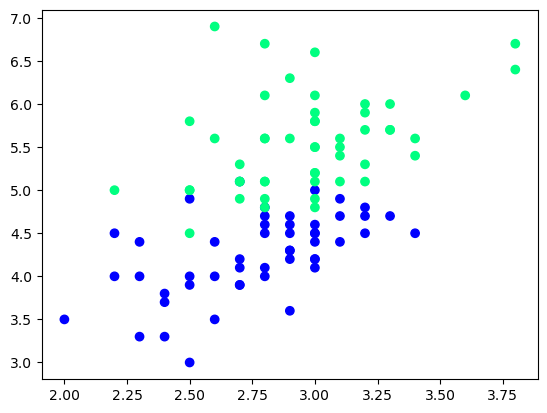

In [22]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [23]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
52,3.1,4.9,1
104,3.0,5.8,2
64,2.9,3.6,1
53,2.3,4.0,1
82,2.7,3.9,1
100,3.3,6.0,2
61,3.0,4.2,1
70,3.2,4.8,1
51,3.2,4.5,1
90,2.6,4.4,1


In [24]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [25]:
df_train

,sepal_width,petal_length,species
107,2.9,6.3,2
81,2.4,3.7,1
86,3.1,4.7,1
143,3.2,5.9,2
56,3.3,4.7,1
125,3.2,6.0,2
113,2.5,5.0,2
94,2.7,4.2,1
133,2.8,5.1,2
60,2.0,3.5,1


In [26]:
df_val

,sepal_width,petal_length,species
76,2.8,4.8,1
108,2.5,5.8,2
85,3.4,4.5,1
54,2.8,4.6,1
120,3.2,5.7,2


In [27]:
df_test

,sepal_width,petal_length,species
72,2.5,4.9,1
110,3.2,5.1,2
123,2.7,4.9,2
104,3.0,5.8,2
89,2.5,4.0,1


In [28]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [29]:
y_test

array([1, 2, 1, 1, 2])

# Case 1 - Bagging

In [30]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
133,2.8,5.1,2
125,3.2,6.0,2
60,2.0,3.5,1
56,3.3,4.7,1
143,3.2,5.9,2
86,3.1,4.7,1
86,3.1,4.7,1
56,3.3,4.7,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [32]:
dt_bag1 = DecisionTreeClassifier()

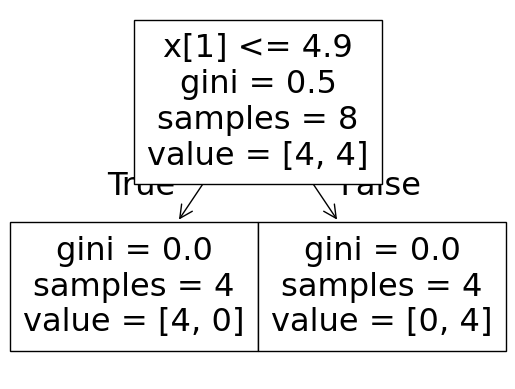

C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


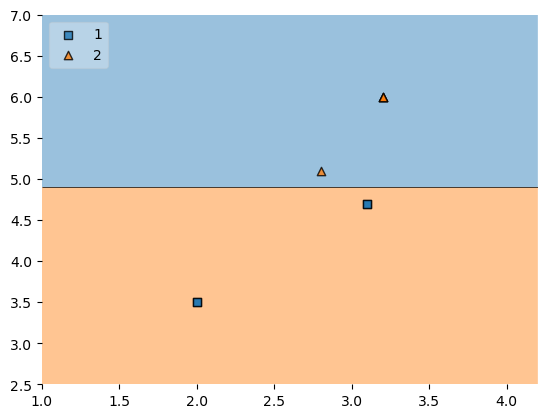

In [40]:
evaluate(dt_bag1,X,y)

In [41]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
113,2.5,5.0,2
56,3.3,4.7,1
143,3.2,5.9,2
143,3.2,5.9,2
107,2.9,6.3,2
86,3.1,4.7,1
86,3.1,4.7,1
56,3.3,4.7,1


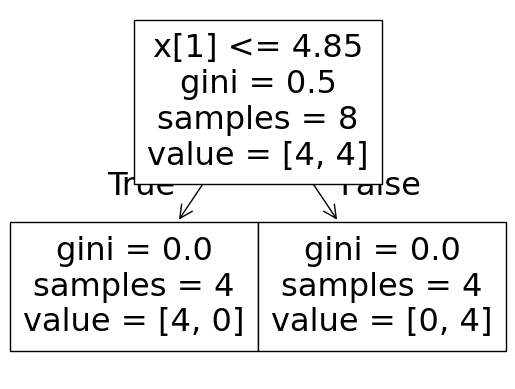

C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


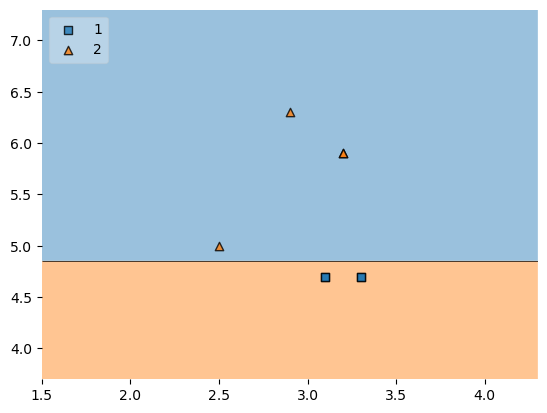

In [42]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [43]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
60,2.0,3.5,1
56,3.3,4.7,1
56,3.3,4.7,1
60,2.0,3.5,1
133,2.8,5.1,2
94,2.7,4.2,1
81,2.4,3.7,1
133,2.8,5.1,2


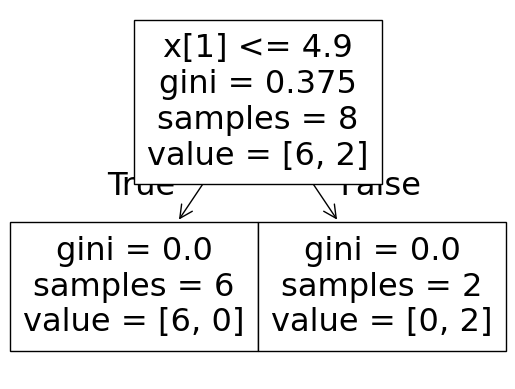

C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


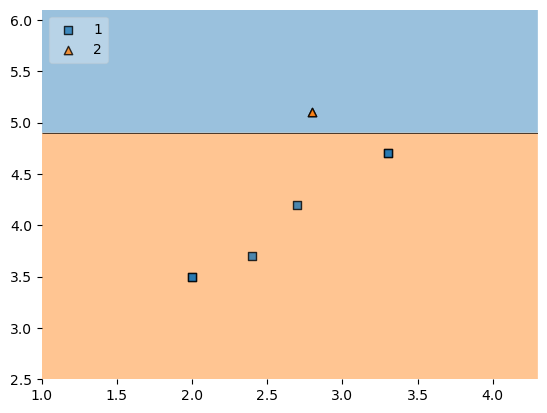

In [44]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [45]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [54]:
df_test

,sepal_width,petal_length,species
72,2.5,4.9,1
110,3.2,5.1,2
123,2.7,4.9,2
104,3.0,5.8,2
89,2.5,4.0,1


In [55]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hanif ullah laptop\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [56]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
107,2.9,6.3,2
81,2.4,3.7,1
86,3.1,4.7,1
143,3.2,5.9,2
56,3.3,4.7,1
125,3.2,6.0,2
113,2.5,5.0,2
94,2.7,4.2,1
133,2.8,5.1,2
60,2.0,3.5,1


In [57]:
df_train.sample(8)

,sepal_width,petal_length,species
94,2.7,4.2,1
56,3.3,4.7,1
125,3.2,6.0,2
113,2.5,5.0,2
81,2.4,3.7,1
133,2.8,5.1,2
60,2.0,3.5,1
86,3.1,4.7,1


# Random Subspaces

In [58]:
df1 = pd.read_csv(url)
df1 = df1.sample(10)

In [59]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
33,5.5,4.2,1.4,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
51,6.4,3.2,4.5,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
39,5.1,3.4,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
78,6.0,2.9,4.5,1.5,versicolor
10,5.4,3.7,1.5,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor


In [60]:
df1.sample(2,replace=True,axis=1)

,sepal_width,sepal_width
139,3.1,3.1
33,4.2,4.2
58,2.9,2.9
51,3.2,3.2
112,3.0,3.0
39,3.4,3.4
0,3.5,3.5
78,2.9,2.9
10,3.7,3.7
54,2.8,2.8


# Random Patches

In [61]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
33,5.5,4.2,1.4,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
51,6.4,3.2,4.5,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
39,5.1,3.4,1.5,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
78,6.0,2.9,4.5,1.5,versicolor
10,5.4,3.7,1.5,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor


In [62]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_width,sepal_width
33,4.2,4.2
51,3.2,3.2
54,2.8,2.8
33,4.2,4.2
112,3.0,3.0
10,3.7,3.7
139,3.1,3.1
39,3.4,3.4
